In [1]:
#importing python standard packages
from datetime import date, timedelta as td
import pandas as pd

#start date and end date
start_date = date(2020, 7, 1)
end_date = date(2020, 9, 20)

date_diff = end_date - start_date

for i in range(date_diff.days + 1):
    dates = start_date + td(days=i)
    #print(dates)
    url = "https://opendata.citywindsor.ca/api/traffic?date="+str(dates)+"&intersectionId=1&start_time=00%3A00&end_time=23%3A59"
    #print(url)
    if i == 0:
      df = pd.read_json(url, orient='columns')
    else:
      df = df.append(pd.read_json(url, orient='columns'))

print(df.shape)
df.head(5)

(616479, 3)


,intersectionId,intersectionDescription,traffic
0,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2020-07-01T00:00:00', 'vehicleT..."
1,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2020-07-01T00:00:00', 'vehicleT..."
2,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2020-07-01T00:00:00', 'vehicleT..."
3,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2020-07-01T00:00:00', 'vehicleT..."
4,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2020-07-01T00:01:00', 'vehicleT..."


In [2]:
#unpacking the json traffic attributes
df1 = pd.DataFrame(df['traffic'].values.tolist())

In [3]:
#Only considering the commercial vehicles
Typeoftruck = ['Light','Bus', 'Bicycle','WorkVan']
df1_onlytrucksdata = df1[~df1.vehicleType.isin(Typeoftruck)]
df1_onlytrucksdata

,timeStamp,vehicleType,entrance,exit,qty,isDaylightSavingsTime
0,2020-07-01T00:00:00,ArticulatedTruck,N,S,1,True
2,2020-07-01T00:00:00,ArticulatedTruck,S,N,3,True
4,2020-07-01T00:01:00,ArticulatedTruck,N,S,1,True
6,2020-07-01T00:01:00,ArticulatedTruck,S,N,1,True
11,2020-07-01T00:03:00,ArticulatedTruck,S,N,1,True
...,...,...,...,...,...,...
616462,2020-09-20T18:11:00,ArticulatedTruck,S,N,7,True
616470,2020-09-20T18:12:00,ArticulatedTruck,S,N,4,True
616472,2020-09-20T18:13:00,ArticulatedTruck,N,S,4,True
616474,2020-09-20T18:13:00,SingleUnitTruck,N,S,1,True


In [4]:
#Data pre processing
#Creating calculated fields

df1_onlytrucksdata['timeStamp'] = pd.to_datetime(df1_onlytrucksdata['timeStamp'])

df1_onlytrucksdata['day_of_week'] = df1_onlytrucksdata['timeStamp'].dt.dayofweek
df1_onlytrucksdata['day'] = df1_onlytrucksdata['timeStamp'].dt.day
df1_onlytrucksdata['day_of_year'] = df1_onlytrucksdata['timeStamp'].dt.dayofyear
df1_onlytrucksdata['year'] = df1_onlytrucksdata['timeStamp'].dt.year
df1_onlytrucksdata['month'] = df1_onlytrucksdata['timeStamp'].dt.month
df1_onlytrucksdata['hours'] = df1_onlytrucksdata['timeStamp'].dt.hour
df1_onlytrucksdata

C:\Users\Tejas Shinde\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Tejas Shinde\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Tejas Shinde\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,timeStamp,vehicleType,entrance,exit,qty,isDaylightSavingsTime,day_of_week,day,day_of_year,year,month,hours
0,2020-07-01 00:00:00,ArticulatedTruck,N,S,1,True,2,1,183,2020,7,0
2,2020-07-01 00:00:00,ArticulatedTruck,S,N,3,True,2,1,183,2020,7,0
4,2020-07-01 00:01:00,ArticulatedTruck,N,S,1,True,2,1,183,2020,7,0
6,2020-07-01 00:01:00,ArticulatedTruck,S,N,1,True,2,1,183,2020,7,0
11,2020-07-01 00:03:00,ArticulatedTruck,S,N,1,True,2,1,183,2020,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
616462,2020-09-20 18:11:00,ArticulatedTruck,S,N,7,True,6,20,264,2020,9,18
616470,2020-09-20 18:12:00,ArticulatedTruck,S,N,4,True,6,20,264,2020,9,18
616472,2020-09-20 18:13:00,ArticulatedTruck,N,S,4,True,6,20,264,2020,9,18
616474,2020-09-20 18:13:00,SingleUnitTruck,N,S,1,True,6,20,264,2020,9,18


In [5]:
traveling_to = ['S','W','E']
df1_onlytoUSA = df1_onlytrucksdata[~df1_onlytrucksdata.entrance.isin(traveling_to)]
df1_onlytoUSA

,timeStamp,vehicleType,entrance,exit,qty,isDaylightSavingsTime,day_of_week,day,day_of_year,year,month,hours
0,2020-07-01 00:00:00,ArticulatedTruck,N,S,1,True,2,1,183,2020,7,0
4,2020-07-01 00:01:00,ArticulatedTruck,N,S,1,True,2,1,183,2020,7,0
16,2020-07-01 00:05:00,ArticulatedTruck,N,S,2,True,2,1,183,2020,7,0
29,2020-07-01 00:08:00,ArticulatedTruck,N,S,1,True,2,1,183,2020,7,0
34,2020-07-01 00:09:00,ArticulatedTruck,N,S,2,True,2,1,183,2020,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
616401,2020-09-20 18:01:00,ArticulatedTruck,N,S,1,True,6,20,264,2020,9,18
616448,2020-09-20 18:09:00,ArticulatedTruck,N,S,2,True,6,20,264,2020,9,18
616460,2020-09-20 18:11:00,ArticulatedTruck,N,S,2,True,6,20,264,2020,9,18
616472,2020-09-20 18:13:00,ArticulatedTruck,N,S,4,True,6,20,264,2020,9,18


In [6]:
#aggregating hour wise
df1_onlytoUSA_agg = df1_onlytoUSA.groupby(
     ['day','month','year','day_of_year','day_of_week','hours']
 ).agg(
     Total_NoOfTrucks = ('qty','sum'),
 ).reset_index()

In [7]:
df1_onlytoUSA_agg.head(5)

,day,month,year,day_of_year,day_of_week,hours,Total_NoOfTrucks
0,1,7,2020,183,2,0,89
1,1,7,2020,183,2,1,91
2,1,7,2020,183,2,2,73
3,1,7,2020,183,2,3,68
4,1,7,2020,183,2,4,68


In [8]:
df_model_data = df1_onlytoUSA_agg[df1_onlytoUSA_agg.month <= 8]
df_unseen_data = df1_onlytoUSA_agg[df1_onlytoUSA_agg.month == 9]

In [9]:
#importing packages and creating models

import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [10]:
# Storing the independent variables in X:
X=df_model_data.drop(['Total_NoOfTrucks'], axis=1)

# Storing the dependent variable in y:
y=df_model_data.Total_NoOfTrucks

# Importing train_test_split from sklearn library:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15, random_state=564)

In [11]:
#Training Models
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(xtrain, ytrain)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [12]:
#calculating train accuracy
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9958940259965375


In [13]:
scores = xgbr.score(xtest, ytest)
print("Testing score: ", scores)

Testing score:  0.9505290761306473


In [14]:
ypred = xgbr.predict(xtest)

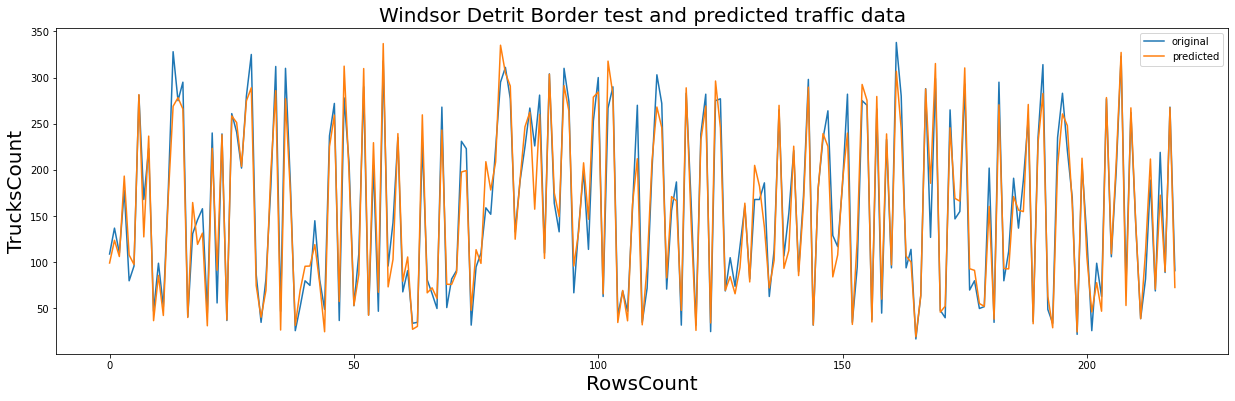

In [15]:
plt.subplots(figsize=(21,6))
x_ax = range(len(ytest))
plt.xlabel('RowsCount',size=20)
plt.ylabel('TrucksCount',size=20)
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Windsor Detrit Border test and predicted traffic data",size=20)
plt.legend()
plt.show()

In [16]:
param_grid={'max_depth':[3,4,5],
           'max_leaf_nodes':[10,15,20],
            'min_samples_split':[10,15,20,25]}
print(param_grid)

{'max_depth': [3, 4, 5], 'max_leaf_nodes': [10, 15, 20], 'min_samples_split': [10, 15, 20, 25]}


In [17]:
from sklearn.model_selection import cross_val_score
scores_xg=cross_val_score(xgbr,X, y, cv=10)
print("Score :"+str(scores_xg))
print("Mean accuracy of the model: "+str(scores_xg.mean()))

Score :[0.65644137 0.91953027 0.95029932 0.95149421 0.93751154 0.96114495
 0.93334207 0.88539705 0.96479194 0.8850207 ]
Mean accuracy of the model: 0.9044973419410847


In [18]:
# Storing the independent variables in X:
X_unseen=df_unseen_data.drop(['Total_NoOfTrucks'], axis=1)

# Storing the dependent variable in y:
y_unseen=df_unseen_data.Total_NoOfTrucks

In [19]:
score_unseen = xgbr.score(X_unseen, y_unseen)
print('Accuracy of unseen data: ',score_unseen)

Accuracy of unseen data:  0.8157697890828056


In [20]:
ypred_unseen = xgbr.predict(X_unseen)

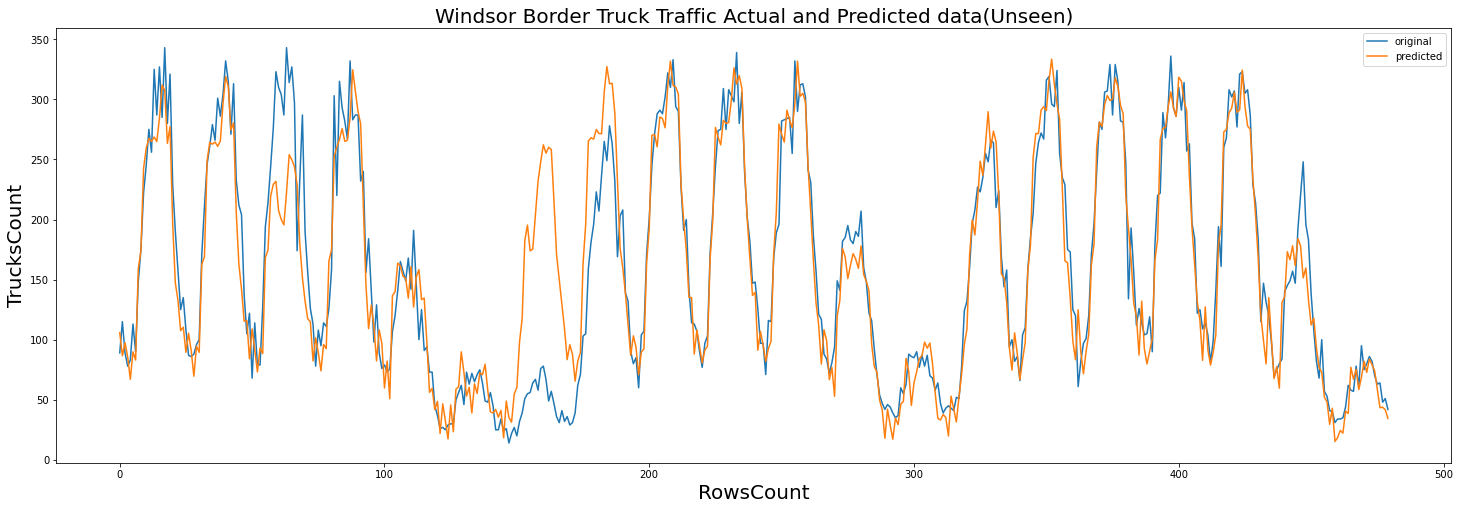

In [21]:
plt.subplots(figsize=(25,8))
x_ax_unseen = range(len(y_unseen))
plt.xlabel('RowsCount',size=20)
plt.ylabel('TrucksCount',size=20)
plt.plot(x_ax_unseen, y_unseen, label="original")
plt.plot(x_ax_unseen, ypred_unseen, label="predicted")
plt.title("Windsor Border Truck Traffic Actual and Predicted data(Unseen)",size=20)
plt.legend()
plt.show()

In [22]:
df_unseen_data['y_pred_unseen'] =ypred_unseen

C:\Users\Tejas Shinde\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_unseen_data.head(5)

,day,month,year,day_of_year,day_of_week,hours,Total_NoOfTrucks,y_pred_unseen
48,1,9,2020,245,1,0,89,105.873741
49,1,9,2020,245,1,1,115,86.609756
50,1,9,2020,245,1,2,89,97.440697
51,1,9,2020,245,1,3,78,85.715607
52,1,9,2020,245,1,4,83,67.053825


In [24]:
import numpy as np
df_model_data['y_pred_unseen']=np.nan
Export_CSV_df_temp = [df_model_data, df_unseen_data]
Export_CSV_df = pd.concat(Export_CSV_df_temp)

C:\Users\Tejas Shinde\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
Export_CSV_df

,day,month,year,day_of_year,day_of_week,hours,Total_NoOfTrucks,y_pred_unseen
0,1,7,2020,183,2,0,89,NaN
1,1,7,2020,183,2,1,91,NaN
2,1,7,2020,183,2,2,73,NaN
3,1,7,2020,183,2,3,68,NaN
4,1,7,2020,183,2,4,68,NaN
...,...,...,...,...,...,...,...,...
1431,20,9,2020,264,6,19,63,58.401268
1432,20,9,2020,264,6,20,64,43.403629
1433,20,9,2020,264,6,21,48,43.811928
1434,20,9,2020,264,6,22,51,41.697330


In [26]:
Export_CSV_df.to_csv('Export_CSV.csv')

In [28]:
xtest.head()

,day,month,year,day_of_year,day_of_week,hours
177,3,8,2020,216,0,9
1099,16,7,2020,198,3,23
458,7,8,2020,220,4,6
449,7,7,2020,189,1,21
525,8,8,2020,221,5,1


In [ ]:
import datetime

date_entry = input('Enter a date in YYYY-MM-DD format')
hour = float(input('Enter time in HH format'))

year, month, day = map(int, date_entry.split('-'))
date = datetime.date(year, month, day)

predicted = [day,month,year,date,hour]

df = pd.DataFrame([predicted], columns=['day','month','year','Date','hours'])
df

df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_year'] = df['Date'].dt.dayofyear

df1 = df[['day','month','year','day_of_year','day_of_week','hours']]
df1
#print(date)
#print(hour)



y_pred_abc = xgbr.predict(df1)

result = int(y_pred_abc)

print("The number of vehicle expected on Date "+str(date)+" and time {0:.2f} are {1:d} ".format(hour,result))